In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

# Содержание каталога
path.ls()

(#3) [Path('/home/sergey/.fastai/data/mnist_sample/valid'),Path('/home/sergey/.fastai/data/mnist_sample/train'),Path('/home/sergey/.fastai/data/mnist_sample/labels.csv')]

In [3]:
(path/'train').ls()

(#2) [Path('/home/sergey/.fastai/data/mnist_sample/train/3'),Path('/home/sergey/.fastai/data/mnist_sample/train/7')]

In [4]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

print(threes)
print('#####################')
print(sevens)

[Path('/home/sergey/.fastai/data/mnist_sample/train/3/10.png'), Path('/home/sergey/.fastai/data/mnist_sample/train/3/10000.png'), Path('/home/sergey/.fastai/data/mnist_sample/train/3/10011.png'), Path('/home/sergey/.fastai/data/mnist_sample/train/3/10031.png'), Path('/home/sergey/.fastai/data/mnist_sample/train/3/10034.png'), Path('/home/sergey/.fastai/data/mnist_sample/train/3/10042.png'), Path('/home/sergey/.fastai/data/mnist_sample/train/3/10052.png'), Path('/home/sergey/.fastai/data/mnist_sample/train/3/1007.png'), Path('/home/sergey/.fastai/data/mnist_sample/train/3/10074.png'), Path('/home/sergey/.fastai/data/mnist_sample/train/3/10091.png'), Path('/home/sergey/.fastai/data/mnist_sample/train/3/10093.png'), Path('/home/sergey/.fastai/data/mnist_sample/train/3/10097.png'), Path('/home/sergey/.fastai/data/mnist_sample/train/3/10099.png'), Path('/home/sergey/.fastai/data/mnist_sample/train/3/10116.png'), Path('/home/sergey/.fastai/data/mnist_sample/train/3/10125.png'), Path('/home/s

In [5]:
from PIL import Image

im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [6]:
"""
Представим изображение в виде тензора NumPy и PyTorch

Например пикселы от 4 до 10 и значения их яркости.
"""
array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [7]:
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [8]:
import pandas as pd


im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [9]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
print(len(three_tensors), len(seven_tensors))

6131 6265


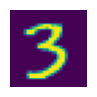

In [10]:
show_image(three_tensors[1]);

In [11]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

stacked_threes.shape

torch.Size([6131, 28, 28])

In [12]:
len(stacked_threes.shape)

3

In [13]:
stacked_threes.ndim

3

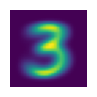

In [14]:
mean3 = stacked_threes.mean(0)

show_image(mean3);

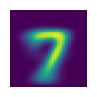

In [15]:
mean7 = stacked_sevens.mean(0)

show_image(mean7);

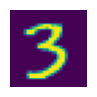

In [16]:
a_3 = stacked_threes[1]

show_image(a_3);

In [17]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3) ** 2).mean().sqrt()

print(f'L1: {dist_3_abs:.04f}')
print(f'L2: {dist_3_sqr:.04f}')


L1: 0.1114
L2: 0.2021


In [18]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7) ** 2).mean().sqrt()

print(f'L1: {dist_7_abs:.04f}')
print(f'L2: {dist_7_sqr:.04f}')

L1: 0.1586
L2: 0.3021


In [19]:
import torch.nn.functional as F

F.l1_loss(a_3.float(), mean7)

tensor(0.1586)

In [20]:
F.mse_loss(a_3, mean7).sqrt()

tensor(0.3021)

In [21]:
import numpy as np
from torch import tensor

data = [[1, 2, 3], [4, 5, 6]]

arr = np.array(data)
tns = tensor(data)

arr

array([[1, 2, 3],
       [4, 5, 6]])

In [22]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [23]:
import torch as tor

In [24]:
tns[1]

tensor([4, 5, 6])

In [25]:
tns[:, 1]

tensor([2, 5])

In [26]:
tns[1, 1:3]

tensor([5, 6])

In [27]:
tns + 1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [28]:
tns.type()

'torch.LongTensor'

In [29]:
tns * 1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [30]:
from fastai.vision.all import *

valid_3_tens = tor.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_7_tens = tor.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])

valid_3_tens = valid_3_tens.float() / 255
valid_7_tens = valid_7_tens.float() / 255


valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [31]:
def mnist_dist(a, b): return (a - b).abs().mean((-1, -2))

mnist_dist(a_3, mean3)

tensor(0.1114)

In [32]:
valid_3_dist = mnist_dist(valid_3_tens, mean3)

valid_3_dist, valid_3_dist.shape

(tensor([0.1677, 0.1115, 0.1257,  ..., 0.1160, 0.1560, 0.1133]),
 torch.Size([1010]))

In [33]:
tensor([1, 2, 3]) + tensor([1])

tensor([2, 3, 4])

In [34]:
(valid_3_tens - mean3).shape

torch.Size([1010, 28, 28])

In [35]:
def is_3(x):
    return mnist_dist(x, mean3) < mnist_dist(x, mean7)

In [36]:
is_3(a_3)

tensor(True)

In [37]:
is_3(a_3).float()

tensor(1.)

In [38]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [39]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float().mean())

In [40]:
accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [41]:
def pr_three(x,w): return (x*w).sum()

In [42]:
def f(x):
    return x**2

In [43]:
xt = tensor(3.).requires_grad_()

In [44]:
yt = f(xt)

In [45]:
yt

tensor(9., grad_fn=<PowBackward0>)

In [46]:
yt.backward()

In [47]:
xt.grad

tensor(6.)

In [48]:
xt = tensor([3., 4., 10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [49]:
def f(x):
    return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [50]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

In [51]:
time = torch.arange(0, 20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

In [52]:
speed = torch.randn(20)*3 + 0.75*(time - 9.5) ** 2 + 1

In [53]:
speed

tensor([64.9742, 56.5009, 41.7085, 31.3841, 26.2468, 15.3678, 13.8213, 10.3740,
        -2.2033,  2.5226, -1.0154,  4.5319,  5.7909,  9.9593, 18.5949, 23.0512,
        34.5647, 37.2737, 54.0648, 69.7105])

In [54]:
import matplotlib.pyplot as plt

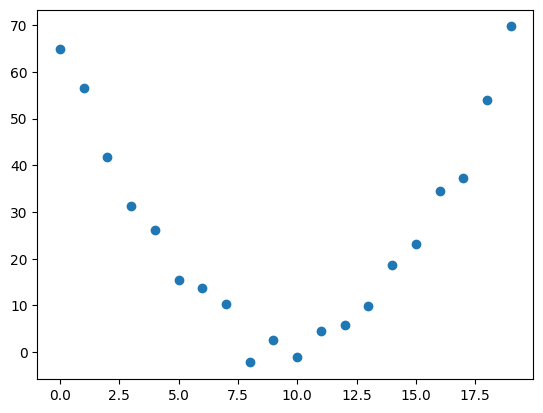

In [55]:
plt.scatter(time, speed);

In [56]:
def f(t, params):
    a, b, c = params
    return a * (t**2) + (b*t) + c

In [57]:
def mse(preds, targets):    
    return ((preds - targets)**2).mean()

In [58]:
#1 
params = torch.randn(3).requires_grad_()

In [59]:
#2 
preds = f(time, params)

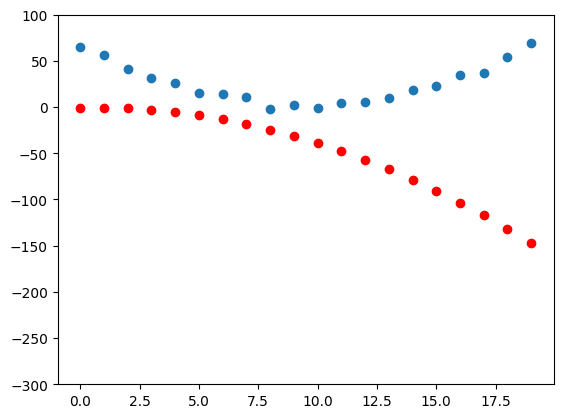

In [60]:
def show_preds(preds, ax=None):
    if ax is None: ax = plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300, 100)

show_preds(preds)

In [61]:
#3
loss = mse(preds=preds, targets=speed)
loss

tensor(8814.1191, grad_fn=<MeanBackward0>)

In [62]:
#4
loss.backward()
params.grad

tensor([-30343.4414,  -1940.9753,   -150.3634])

In [63]:
params.grad * 1e-5

tensor([-0.3034, -0.0194, -0.0015])

In [64]:
params

tensor([-0.4331,  0.5105, -0.6777], requires_grad=True)

In [65]:
#5 
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

preds = f(time, params)
mse(preds, speed)

tensor(2180.6987, grad_fn=<MeanBackward0>)

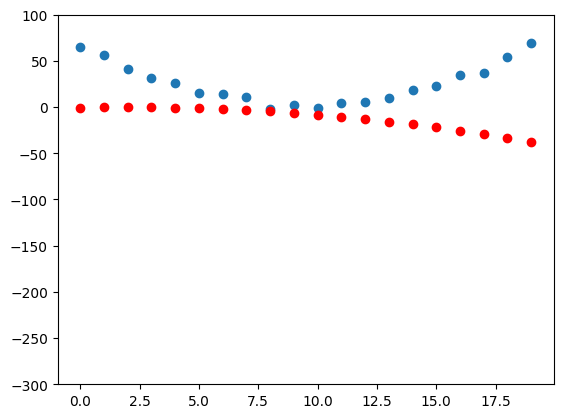

In [66]:
show_preds(preds)

In [67]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [68]:
#6
for i in range(10): apply_step(params)

2180.69873046875
925.4503784179688
687.9164428710938
642.9652099609375
634.4562377929688
632.843505859375
632.53564453125
632.4746704101562
632.4605102539062
632.4551391601562


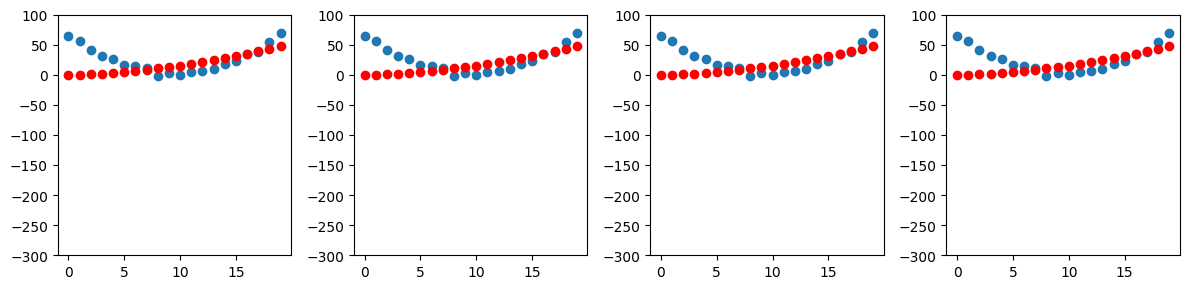

In [69]:
_, axs = plt.subplots(1, 4, figsize=(12, 3))

for ax in axs:
    show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [70]:
#7

In [71]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [73]:
torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1] * len(threes) + [0] * len(sevens)).unsqueeze(1)

In [74]:
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [75]:
dset = list(zip(train_x, train_y))

x, y = dset[0]

x.shape, y

(torch.Size([784]), tensor([1]))

In [76]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1] * len(valid_3_tens) + [0] * len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [77]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [78]:
weights = init_params((28*28, 1))

In [79]:
bias = init_params(1)

In [80]:
(train_x[0] * weights.T).sum() + bias

tensor([1.6276], grad_fn=<AddBackward0>)

In [81]:
def linear1(xb): return xb @ weights + bias

preds = linear1(train_x)
preds

tensor([[ 1.6276],
        [-0.0875],
        [ 6.4499],
        ...,
        [-6.8545],
        [ 7.7703],
        [-0.3245]], grad_fn=<AddBackward0>)

In [82]:
corrects = (preds > 0.0).float() == train_y
corrects

tensor([[ True],
        [False],
        [ True],
        ...,
        [ True],
        [False],
        [ True]])

In [83]:
corrects.float().mean().item()

0.46837690472602844

In [84]:
with torch.no_grad():
    weights[0] *= 1.0001

preds = linear1(train_x)

((preds > 0.0).float() == train_y).float().mean().item()

0.46837690472602844

In [85]:
trgts = tensor([1, 0, 1])
prds = tensor([.9, .4, .2])

In [86]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [87]:
help(torch.where)

Help on built-in function where in module torch:

where(...)
    where(condition, x, y) -> Tensor
    
    Return a tensor of elements selected from either :attr:`x` or :attr:`y`, depending on :attr:`condition`.
    
    The operation is defined as:
    
    .. math::
        \text{out}_i = \begin{cases}
            \text{x}_i & \text{if } \text{condition}_i \\
            \text{y}_i & \text{otherwise} \\
        \end{cases}
    
    .. note::
        The tensors :attr:`condition`, :attr:`x`, :attr:`y` must be :ref:`broadcastable <broadcasting-semantics>`.
    
    Arguments:
        condition (BoolTensor): When True (nonzero), yield x, otherwise yield y
        x (Tensor or Scalar): value (if :attr:`x` is a scalar) or values selected at indices
                              where :attr:`condition` is ``True``
        y (Tensor or Scalar): value (if :attr:`y` is a scalar) or values selected at indices
                              where :attr:`condition` is ``False``
    
    Returns:


In [88]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [89]:
mnist_loss(prds, trgts)

tensor(0.4333)

In [90]:
mnist_loss(tensor([.9, .4, .8]), trgts)

tensor(0.2333)

In [91]:
def sigmoid(x): return 1 / (1 + torch.exp(-x))

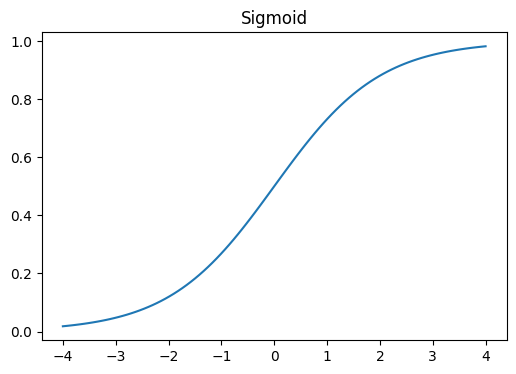

In [92]:
# !pip install utils
# !pip install fastbook
# !pip install -Uqq fastbook
from utils import *


def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max, steps=100)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)


In [93]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [94]:
mnist_loss(prds, trgts)

tensor(0.4460)

In [95]:
mnist_loss(tensor([.9, .4, .8]), trgts)

tensor(0.3993)

In [96]:
# dataloader - класс , который примает любое количество данных и собирает их в пакеты 

coll = range(15)

dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 0,  1, 13, 10,  5]),
 tensor([3, 2, 8, 9, 7]),
 tensor([ 6, 14,  4, 11, 12])]

In [97]:
# dataset - коллекция, содержащая коллекции независимых переменных и зависимых

ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [98]:
dl = DataLoader(ds, batch_size=6, shuffle=True)

list(dl)

[(tensor([12,  7, 22, 25, 19,  2]), ('m', 'h', 'w', 'z', 't', 'c')),
 (tensor([ 5,  6, 18, 14,  3, 11]), ('f', 'g', 's', 'o', 'd', 'l')),
 (tensor([16, 17, 24,  8, 10,  0]), ('q', 'r', 'y', 'i', 'k', 'a')),
 (tensor([ 1, 20,  4, 21, 15,  9]), ('b', 'u', 'e', 'v', 'p', 'j')),
 (tensor([23, 13]), ('x', 'n'))]

In [157]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from torch import nn

# x = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
# y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)
# model = nn.Linear(input_size, output_size)
"""model = nn.Linear(28*28, 1)
loss_func = nn.CrossEntropyLoss()

for x, y in dl:
    pred = model(x)
    loss = loss_func(pred, y)
    loss.backward()
    
    parameters -= parameters.grad * lr
"""

'model = nn.Linear(28*28, 1)\nloss_func = nn.CrossEntropyLoss()\n\nfor x, y in dl:\n    pred = model(x)\n    loss = loss_func(pred, y)\n    loss.backward()\n    \n    parameters -= parameters.grad * lr\n'

In [158]:
weights = init_params((28*28, 1))
bias = init_params(1)

In [159]:
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)

xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [160]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [161]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [162]:
preds = linear1(batch)

In [163]:
preds

tensor([[ 7.2781],
        [-2.0613],
        [ 0.7487],
        [ 6.2127]], grad_fn=<AddBackward0>)

In [164]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.3027, grad_fn=<MeanBackward0>)

In [165]:
loss.backward()

weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0115), tensor([-0.0802]))

In [166]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [167]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0230), tensor([-0.1604]))

In [168]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [202]:
def train_epoch(model=linear1, lr=0.001, params=None):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad * lr
            p.grad.data.zero_()

In [203]:
(preds > 0.5).float() == train_y[:4]

tensor([[ True],
        [False],
        [ True],
        [ True]])

In [204]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [205]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(1.)

In [206]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [207]:
validate_epoch(linear1)

0.4932

In [208]:
lr = 1.

params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward
    
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 0.4932 

In [209]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from torch import nn

In [210]:
linear_model = nn.Linear(28*28, 1)

In [241]:
w, b = linear_model.parameters()

w.requires_grad=True
b.requires_grad=True

w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [256]:
from torch.autograd import Variable

W = Variable(torch.randn(1, 784), requires_grad=True)
b = Variable(torch.randn(1), requires_grad=True)

"""
Try to use this
"""

W.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [293]:
# Optimizator
from torch.autograd import Variable

W = Variable(torch.randn(1, 784), requires_grad=True)
b = Variable(torch.randn(1), requires_grad=True)

lr = 1.

class BasicOptim:
    
    def __init__(self, params, lr):
        self.params, self.lr = list(params), lr
        
    def step(self, *args, **kwargs):
        for b in self.params:
            
            b.grad.data.zero_()
            b = b.data - lr*b.grad.data
    
    def zero_grad(self, *args, **kwargs):
        for b in self.params:
            b.grad = None
            
opt = BasicOptim([W, b], lr).zero_grad() 

def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward

def train_epoch(model):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [294]:
validate_epoch(linear_model)

0.4491

In [295]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [298]:
# train_model(linear_model, 20)

# dot't know why this is not working

In [299]:
linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 

In [300]:
dls = DataLoaders(dl, valid_dl)

In [301]:
learn = Learner(dls, nn.Linear(28*28, 1), opt_func=SGD, 
               loss_func=mnist_loss, metrics=batch_accuracy)

In [302]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637641,0.503180,0.495584,00:00
1,0.442779,0.269617,0.749755,00:00
2,0.166182,0.165035,0.851816,00:00
3,0.074514,0.101554,0.915604,00:00
4,0.040662,0.075467,0.934740,00:00
5,0.027381,0.061036,0.946516,00:00
6,0.021876,0.051912,0.955839,00:00
7,0.019393,0.045782,0.963199,00:00
8,0.018107,0.041447,0.965653,00:00
9,0.017318,0.038237,0.967615,00:00
